# Student Identification
* Your name

* Your student number

Here's where we importlibraries needed by the document.  The `linclass` module can be downloaded from Moodle.  Make sure it's in the same directory as this document.

In [1]:
import matplotlib.pyplot as plt
import linclass as lc

## The Data 
The data consists of tuples $(x_1,x_2,y)$ where the attributes are $x_1$ and $x_2$, and the class label is $y$.  The training process looks at the $y$ values, but the resulting classifier does not.

In [2]:
D = [ (1, 4, 1), (3, 4, 1), (1, 2, 1), (2, 3, 1), (2, 4, 0),
      (2, 1, 0), (4, 1, 0), (4, 3, 0), (3, 2, 0), (2, 2, 1),
      (1, 3, 1)]

## Applying a Linear Classifier  -- Failure!
Here we set the value for slope and $y$-intercept for a line through the region containing the data.  We could use a random line, but it's more valuable as an educational experience if we can see the starting position.

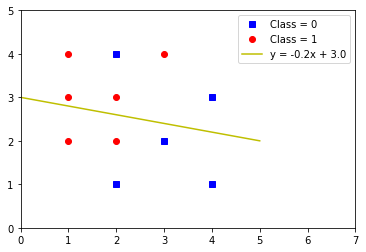

In [11]:
# intuitive form:
m, b = -0.2, 3

# in terms of coefficients in a general line through 2D
line = lc.Line([-b, -m, 1])

# Plot the data and the line

# plot the two classes' points
class_0 = [(x1,x2) for (x1,x2,y) in D if y == 0]
class_1 = [(x1,x2) for (x1,x2,y) in D if y == 1]

plt.plot([x1 for (x1,x2) in class_0], [x2 for (x1,x2) in class_0], "bs")
plt.plot([x1 for (x1,x2) in class_1], [x2 for (x1,x2) in class_1], "ro")

# plot the line
plt.plot(range(0,6), [line.f([1, x1]) for x1 in range(0,6)],"y")

# set the extent of the axes, and add a key/legend to the figure
plt.xlim(0,7)
plt.ylim(0,5)
plt.legend(['Class = 0', 'Class = 1', line.mxb()])  
plt.show()

The data points are not linearly separable, so a linear classifier will always have a few classification errors.

In [4]:
pretrained = lc.LinearClassifier()

pretrained.tabulate_class(D, line)

   x1   x2   LM   Pred Class
  1.0  4.0  1.2   1    1
  3.0  4.0  1.6   1    1
  1.0  2.0 -0.8   0    1 ** Classification error
  2.0  3.0  0.4   1    1
  2.0  4.0  1.4   1    0 ** Classification error
  2.0  1.0 -1.6   0    0
  4.0  1.0 -1.2   0    0
  4.0  3.0  0.8   1    0 ** Classification error
  3.0  2.0 -0.4   0    0
  2.0  2.0 -0.6   0    1 ** Classification error
  1.0  3.0  0.2   1    1


You can count the misclassifications.

## TO DO: Increase the number of learning steps
Because the data are not linearly separable, fitting the linear classifier to the data will not work very well.  Each misclassified point pulls the line towards it, but if there are misclassified points on both sides, the misclassified points tend to push the line in equal and opposite directions.  

In the code below, the number of steps is determined by the variable `steps` which is currently set to `0`.  And a few lines later, we plot the effect of learning.  

1. Set `steps = 1`; rerun the learning, and replot the data and the lines.  Notice how the line changed.
1. Set `steps = 2`; rerun the learning, and replot the data and the lines.  Notice how the line changed.
1. Experiment with the value of `steps`.  How many steps before the line stops moving?
1. Experiment with the value of `alpha`.  Set `alpha` larger and smaller, and see the effect.

To complete this TODO item, set the value for `steps` and `alpha` to values that demonstrate that the line does move.  You'll get different lines for different choices of these variables.

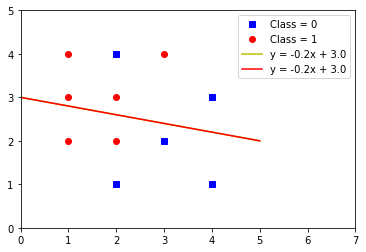

In [5]:
# create a linear classifier object
fitting = lc.LinearClassifier()

# start with the original line
line2 = line

# initial learning rate
alpha = 0.1

# how many steps to use
steps = 0

# fit the model, by taking enough steps
for i in range(steps):
    # look at all the data each time
    for pt in D:
        line2 = fitting.best_step(line2, alpha, pt)

# Now plot the old line and the new line, showing all the data.

# points from the two classes
plt.plot([x1 for (x1,x2) in class_0], [x2 for (x1,x2) in class_0], "bs")
plt.plot([x1 for (x1,x2) in class_1], [x2 for (x1,x2) in class_1], "ro")

# the original line 
plt.plot(range(0,6), [line.f([1, x1]) for x1 in range(0,6)],"y")

# the new line
plt.plot(range(0,6), [line2.f([1, x1]) for x1 in range(0,6)],"r")

plt.xlim(0,7)
plt.ylim(0,5)
plt.legend(['Class = 0', 'Class = 1', line.mxb(), line2.mxb()])  # in the order of the calls to plot() above
plt.show()

The learning process shifts and rotates the red line, but the process never finds a local minimum because the data is not linearly separable.  

In [6]:
pretrained = lc.LinearClassifier()

pretrained.tabulate_class(D, line2)

   x1   x2   LM   Pred Class
  1.0  4.0  1.2   1    1
  3.0  4.0  1.6   1    1
  1.0  2.0 -0.8   0    1 ** Classification error
  2.0  3.0  0.4   1    1
  2.0  4.0  1.4   1    0 ** Classification error
  2.0  1.0 -1.6   0    0
  4.0  1.0 -1.2   0    0
  4.0  3.0  0.8   1    0 ** Classification error
  3.0  2.0 -0.4   0    0
  2.0  2.0 -0.6   0    1 ** Classification error
  1.0  3.0  0.2   1    1


## Logistic Classifier
A logistic classifier uses a line to orient a smooth transition between the two classes; the transition is represented by the logistic function, also called the sigmoid function.  It can be applied to data that is not linearly separable.  In the `lc` module, it has the same interface as the Linear Classifier.

## TO DO: Increase the number of learning steps
In the code below, the number of steps is determined by the variable `steps` which is currently set to `0`.  And a few lines later, we plot the effect of learning.  

1. Set `steps = 1`; rerun the learning, and replot the data and the lines.  Notice how the line changed.
1. Set `steps = 2`; rerun the learning, and replot the data and the lines.  Notice how the line changed.
1. Experiment with the value of `steps`.  How many steps before the line stops moving?
1. Experiment with the value of `alpha`.  Set `alpha` larger and smaller, and see the effect.

To complete this TODO item, set the values for `steps` and `alpha` that produce a logistic classifier that misclassifies exactly one point.

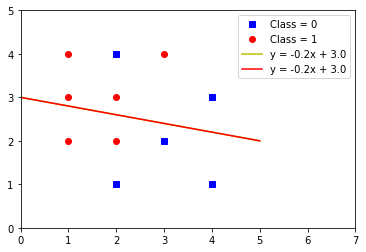

In [9]:
# create a linear classifier object
fitting = lc.LogisticClassifier()

# start with the original line
line2 = line

# initial learning rate
alpha = 0.1

# how many steps to use
steps = 0

# fit the model, by taking enough steps
for i in range(steps):
    # look at all the data each time
    for pt in D:
        line2 = fitting.best_step(line2, alpha, pt)

# Now plot the old line and the new line, showing all the data.

# points from the two classes
plt.plot([x1 for (x1,x2) in class_0], [x2 for (x1,x2) in class_0], "bs")
plt.plot([x1 for (x1,x2) in class_1], [x2 for (x1,x2) in class_1], "ro")

# the original line 
plt.plot(range(0,6), [line.f([1, x1]) for x1 in range(0,6)],"y")

# the new line
plt.plot(range(0,6), [line2.f([1, x1]) for x1 in range(0,6)],"r")

plt.xlim(0,7)
plt.ylim(0,5)
plt.legend(['Class = 0', 'Class = 1', line.mxb(), line2.mxb()])
plt.show()

Using the `tabulate_class()` method, we can examine how the data gets classified by the logistic classifier.  

In [10]:
fitting.tabulate_class(D, line2)

  x1   x2   LM   Pred Class
  1.0  4.0  1.2  0.8    1
  3.0  4.0  1.6  0.8    1
  1.0  2.0 -0.8  0.3    1 ** Classification error
  2.0  3.0  0.4  0.6    1
  2.0  4.0  1.4  0.8    0 ** Classification error
  2.0  1.0 -1.6  0.2    0
  4.0  1.0 -1.2  0.2    0
  4.0  3.0  0.8  0.7    0 ** Classification error
  3.0  2.0 -0.4  0.4    0
  2.0  2.0 -0.6  0.4    1 ** Classification error
  1.0  3.0  0.2  0.5    1


The `Pred` value is greater than 0.5 for points above the line, meaning its guess is Class 1, and for points below the line, its guess is less than 0.5, meaning Class 0.  The `Pred` value can also be interpreted as the probability of being Class 1, given the line, and the point.